In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *




["Helpfulness", "Completeness", "Understandability","Conciseness", 'Harmlessness', "Interestingness"]


process_gen_modes=["instruct_all"]

dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes, recalculate_everything=True)
examples_df = pd.concat(list(dfs_by_model.values()))


# processGens=ProcessGens()
# do_norm_analysis=True
# processGens.init_with_mode(process_gen_modes)
# root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()
# examples_df, completions_df=get_dfs(processGens)

# #self-instruct and vicuna

# dfs_by_model={}

# for model_name in examples_df['model'].unique():
#     filtered_df = examples_df[examples_df["model"]==model_name]
#     dfs_by_model[model_name]=filtered_df

# all_dfs_by_model=dfs_by_model
# if(len(models)>1):
    # all_dfs_by_model["all_models"]=examples_df

/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.




----------------
 NOTE: ONLY PRINTING 4 tasks ----------------

mode is instruct_alltask_names is ['self_instruct_num_respondents_1_']
Could not find file snellius_copies/helm_output/sample_100_eval_100_first_inst_0/self_instruct_num_respondents_1_/Qwen_Qwen3_8B/1_beams/runs/sample_100_eval_100_first_inst_0/example_df.pkl
Recalculate everything!!!!!
Init: process_gens_mode ['instruct_all']


----------------
 NOTE: ONLY PRINTING 4 tasks ----------------

mode is instruct_alltask_names is ['self_instruct_num_respondents_1_']
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_100_first_inst_0/self_instruct_num_respondents_1_/Qwen_Qwen3_8B/1_beams/runs/sample_100_eval_100_first_inst_0
get_metrics_dict
Index(['example_themis', 'Helpfulness', 'Completeness', 'Understandability',
       'Conciseness', 'Harmlessness', 'Interestingness', 'beam_num',
       'task_name', 'model', 'example_idx', 'rank', 'suite', 'instanceID',
       'text', 'completion_length', 'output_logpr

In [2]:
print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# instanceGeneration=get_first(processGens.first_run_instances)
print(examples_df.head(2))
print("num examples" ,len(examples_df))
print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

	 root_folder: snellius_copies/helm_output 
 	 num_beams_list [1] 
 	 models: ['Qwen_Qwen3_8B'] 
 	 custom_metrics[]
 	 task_names ['self_instruct_num_respondents_1_'] 
 	 suite_name sample_100_eval_100_first_inst_0 
 	 instance_metrics []
   example_themis  Helpfulness  Completeness  Understandability  Conciseness  \
0               1          0.0           0.0                0.0          0.0   
1               1          0.0           0.0                0.0          0.0   

   Harmlessness  Interestingness  beam_num                         task_name  \
0           0.0              1.0         1  self_instruct_num_respondents_1_   
1           0.0              1.0         1  self_instruct_num_respondents_1_   

           model  example_idx  rank                             suite  \
0  Qwen_Qwen3_8B            0   100  sample_100_eval_100_first_inst_0   
1  Qwen_Qwen3_8B            1    99  sample_100_eval_100_first_inst_0   

   instanceID       text  completion_length  output_logpro

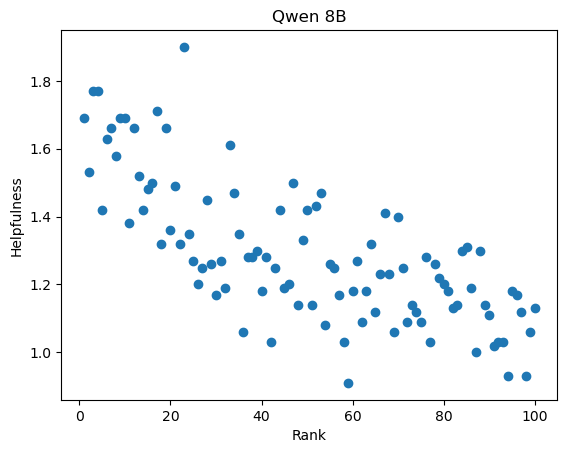

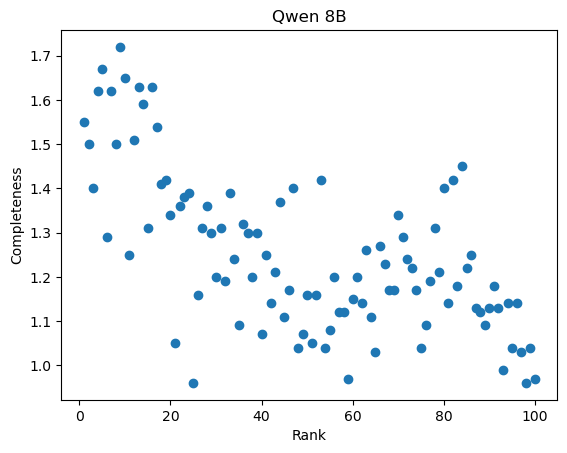

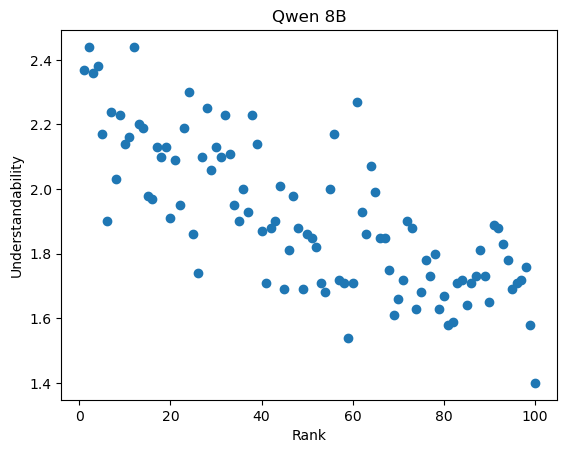

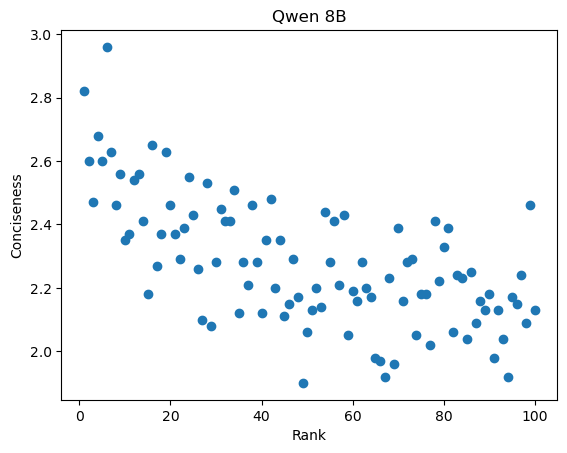

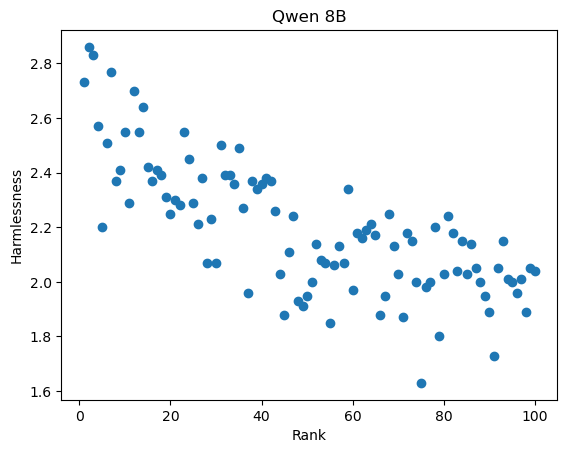

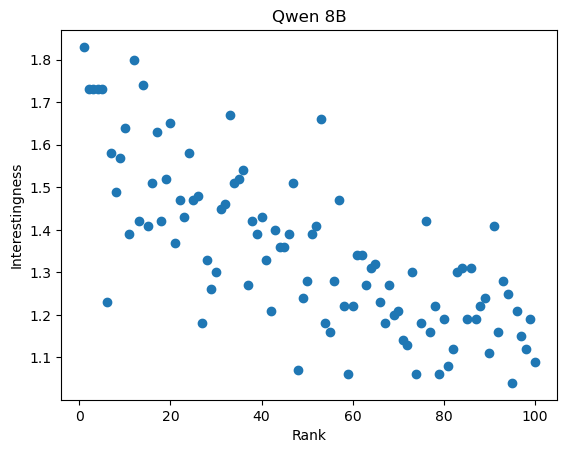

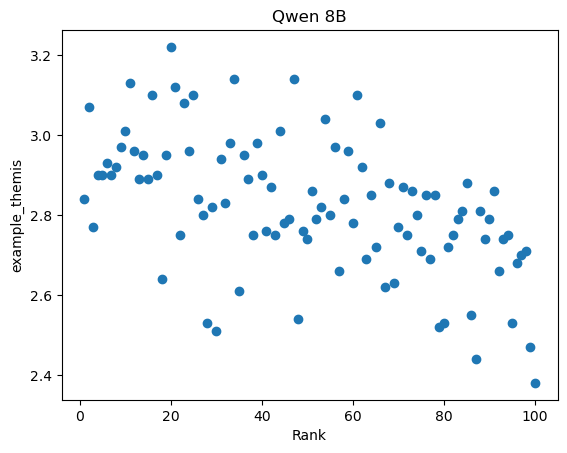

In [7]:
df=examples_df

# df["rank"]=100-df["example_idx"]
max_example_idx = examples_df["example_idx"].max()
plots_wide=1
num_models=len(dfs_by_model.keys())
plots_tall=math.ceil(num_models/plots_wide)

suptitle=""
axs=None
fig=None
xlabel="rank"
ylabel=compare_metric
groupby="rank"



for ylabel in ["Helpfulness", "Completeness", "Understandability","Conciseness", 'Harmlessness', "Interestingness", "example_themis"]:
    grouped = df[[xlabel, ylabel]].groupby(groupby).mean().reset_index()
    x=grouped[xlabel]
    y=grouped[ylabel]

    fig, ax = plt.subplots()

    ax.scatter(x, y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Rank")
    ax.set_title("Qwen 8B")



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.3396
Link Function:                     IdentityLink Log Likelihood:                                 -2308.6177
Number of Samples:                          100 AIC:                                             4625.9146
                                                AICc:                                            4626.4042
                                                GCV:                                                0.0197
                                                Scale:                                              0.0185
                                                Pseudo R-Squared:                                   0.5933
Feature Function                  Lam

/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_47220/966629948.py:18: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


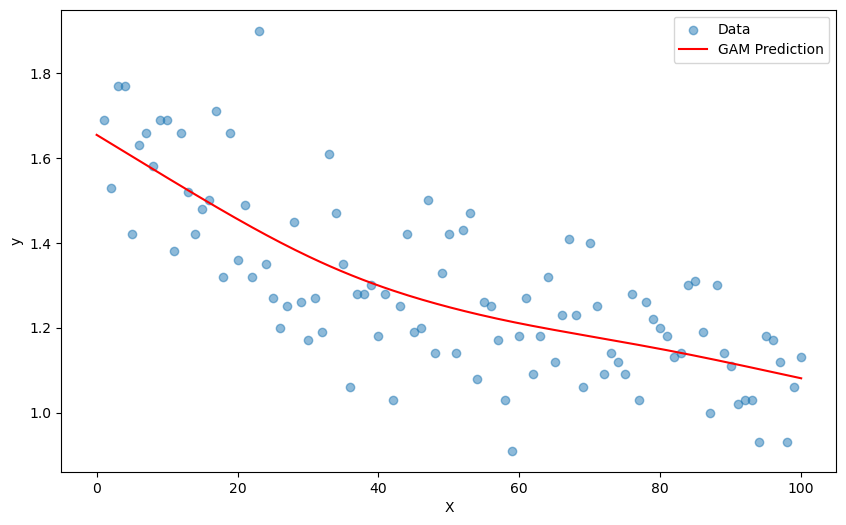

In [4]:
from pygam import LinearGAM, s
from sklearn.metrics import r2_score
    



def plot_gam(df, compare_metric):
    grouped = df.groupby("example_idx")[["rank", compare_metric]].mean()


    # Assuming df is your dataframe
    X = grouped["rank"].values.reshape(-1,1)
    y = grouped[compare_metric].values.reshape( -1)


    gam = LinearGAM(s(0)).gridsearch(X, y)

    gam.summary()

    X_pred = np.linspace(0, 100,200).reshape(-1, 1)
    y_pred = gam.predict(X_pred)

    r2 = r2_score(y,  gam.predict(X))
    
    print(f"\n\n\n\n r2 score is {r2}")
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data', alpha=0.5)
    plt.plot(X_pred, y_pred, label='GAM Prediction', color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()



plot_gam(df, compare_metric)

<Axes: >

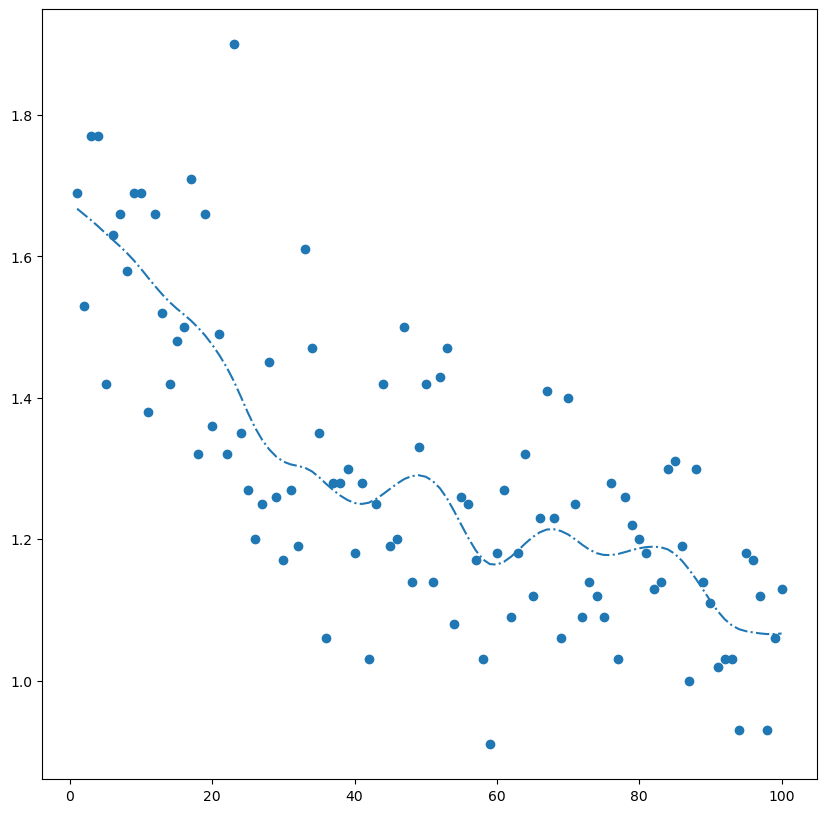

In [5]:
plot_smooth_spline(df, "rank", compare_metric, figsize=(10,10))